In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

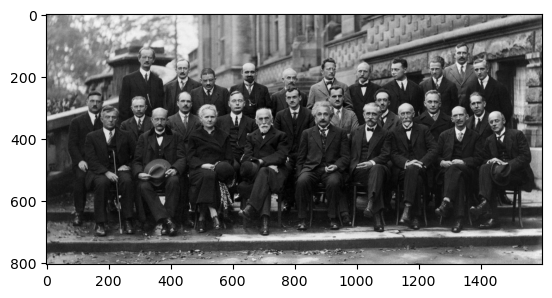

In [9]:
#upload 3 images and in gray scale

nadia = cv2.imread('Nadia_Murad.jpg',0)
denis = cv2.imread('Denis_Mukwege.jpg',0)
solvay = cv2.imread('solvay_conference.jpg',0)

#plt.imshow(nadia,cmap='gray')
#plt.imshow(denis,cmap='gray')
plt.imshow(solvay,cmap='gray')

In [11]:
facecascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [49]:
def detect_face(img) : 
    face_img = img.copy()
    face_rect = facecascade.detectMultiScale(face_img , scaleFactor=1.2 , minNeighbors=5)
    for (x,y,w,h) in face_rect : 
        cv2.rectangle(face_img, (x,y) , (x+w , y+h) , (0,0,255) , 10)
    return face_img

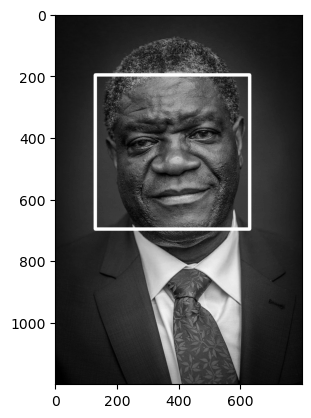

In [51]:
result = detect_face(denis)
plt.imshow(result , cmap="gray")

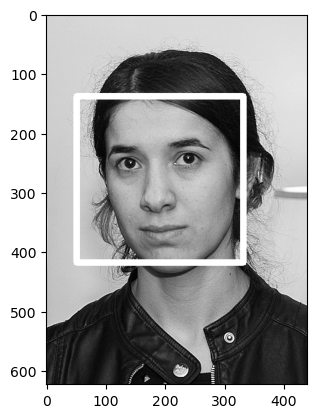

In [53]:
result = detect_face(nadia)
plt.imshow(result , cmap="gray")

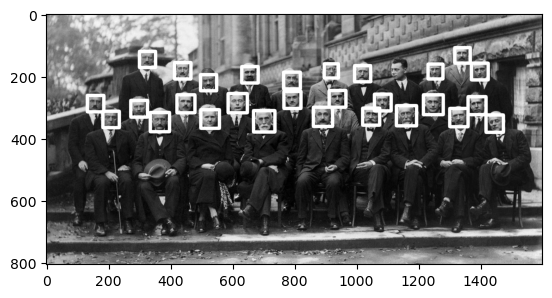

In [55]:
result = detect_face(solvay)
plt.imshow(result , cmap="gray")

In [67]:
cap = cv2.VideoCapture(0) #0 default camera

#width and hieght of actual capture

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) #return like 1080.0
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    
    ret,frame =cap.read() #tuple unpacking
    
    #frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) #covnert iamge to grayscale
    frame = detect_face(frame)
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(1) & 0xFF == 27: #ESC key
        break
        
cap.release()
cv2.destroyAllWindows()
    